In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas
from geopandas import gpd
import seaborn as sns

## Accidents 2018 by Month

In [9]:
acc_18= pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/e769eb9d-d778-4cd7-9e3a-5858bba49b20/resource/f94d9ac3-e46e-47cd-a3d0-a9b5b9639d86/download/2018_accidents_gu_bcn.csv')

In [10]:
acc_18.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus',
       'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud'],
      dtype='object')

In [43]:
acc_18.loc[(acc_18['Descripcio_dia_setmana']=='Diumenge')|(acc_18['Descripcio_dia_setmana']=='Dissabte'),'Descripcio_tipus_dia']='Fin de semana'

In [62]:
acc_18.loc[acc_18['Descripcio_torn']=='Nit','Descripcio_torn']='Vit'

In [63]:
acc_by_day_type =acc_18.groupby(['Descripcio_tipus_dia','Descripcio_torn'], as_index=False).sum()
acc_by_day_type

,Descripcio_tipus_dia,Descripcio_torn,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,Fin de semana,Matí,2991,16537,162111666,1243088,4006,9533,6437,1,755,12,768,1169,2.649480e+08,2.823610e+09,1332.274665,66836.453395
1,Fin de semana,Tarda,4365,24473,223013072,1818218,5891,14094,15718,3,1149,24,1176,1725,3.876189e+08,4.129945e+09,1949.742107,78664.242697
2,Fin de semana,Vit,2148,12186,109286313,898010,3011,6853,4462,4,512,12,528,872,1.915509e+08,2.039770e+09,964.255231,59756.830531
3,Laboral,Matí,16244,91039,821450288,6679580,21256,51937,33121,2,3711,58,3771,6347,1.423664e+09,1.517199e+10,20144.834377,343760.401325
4,Laboral,Tarda,18811,104679,984691010,7946884,25465,61995,67888,6,4658,110,4774,7599,1.693614e+09,1.805053e+10,10635.044556,287071.126634
5,Laboral,Vit,3484,19390,189503733,1465068,4776,11169,9754,5,856,20,881,1381,3.122960e+08,3.327757e+09,1570.617187,30056.289804


In [65]:
acc_by_day_type.Descripcio_torn.value_counts()

Matí     2
Tarda    2
Vit      2
Name: Descripcio_torn, dtype: int64

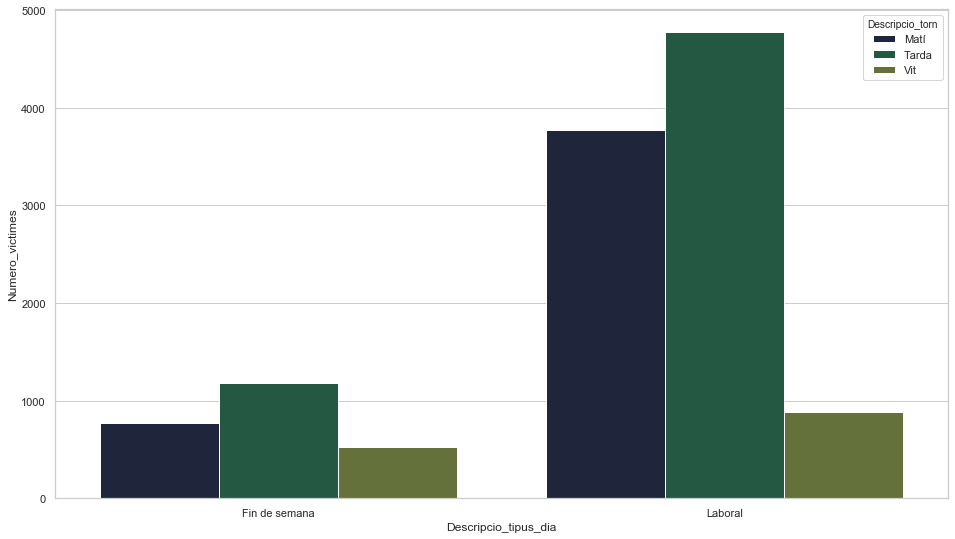

In [64]:
palette = sns.color_palette("cubehelix")

ax = plt.figure(figsize=(16,9))
sns.barplot(x="Descripcio_tipus_dia", y="Numero_victimes",hue='Descripcio_torn',
                  palette=palette, data=acc_by_day_type)
ax.savefig('Acc_by_day_type.png', dpi=400)

In [9]:
acc_18_mes=acc_18.groupby(['Any','Mes_any','Nom_mes'], as_index=False ).sum()

In [10]:
acc_18_mes.loc[acc_18_mes['']]

,Any,Mes_any,Nom_mes,Codi_districte,Codi_barri,Codi_carrer,Dia_mes,Hora_dia,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018,1,Gener,4134,22935,211138801,14113,11673,1,967,25,993,1614,3.658722e+08,3.900707e+09,3999.560068,35231.152222
1,2018,2,Febrer,3683,20400,191257894,11362,10991,3,877,19,899,1502,3.311474e+08,3.529451e+09,1664.899611,31877.980928
2,2018,3,Març,4220,23531,218923482,12212,12188,0,1008,19,1027,1628,3.706890e+08,3.951130e+09,1863.537534,35686.586171
3,2018,4,Abril,3999,22126,210250160,13675,11700,2,1004,19,1025,1634,3.667707e+08,3.909829e+09,1843.512105,76647.174083
4,2018,5,Maig,4075,22512,214833353,13616,12211,1,1009,21,1031,1733,3.759066e+08,4.006003e+09,6170.894573,118878.423023
5,2018,6,Juny,4043,22693,207369834,13687,11297,1,980,18,999,1629,3.562019e+08,3.795362e+09,1791.628933,34279.696857
6,2018,7,Juliol,4093,22951,227308694,13727,12085,0,1015,23,1038,1658,3.717186e+08,3.960153e+09,1869.905818,242483.170874
7,2018,8,Agost,3222,18061,163734084,10505,9201,5,846,29,880,1306,2.947987e+08,3.139852e+09,1483.581034,28359.140875
8,2018,9,Setembre,3625,20314,183288449,12301,10510,3,897,12,912,1442,3.230242e+08,3.442362e+09,3785.228689,72425.024271
9,2018,10,Octubre,4938,27865,255350285,15767,13524,2,1137,13,1152,1893,4.254598e+08,4.533419e+09,4300.787310,82290.434829


## Accidents 2017 by Month

In [11]:
acc_17= pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/e769eb9d-d778-4cd7-9e3a-5858bba49b20/resource/acc9db4c-17b2-4862-8bcc-ed216f8e5839/download/2017_accidents_gu_bcn.csv')

In [12]:
acc_17_mes=acc_17.groupby(['Any','Mes_any','Nom_mes'], as_index=False ).sum()

## Accidents 2016 by Month

In [13]:
acc_16=pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/e769eb9d-d778-4cd7-9e3a-5858bba49b20/resource/be253540-d3ec-418f-9b72-386492fa5269/download/2016_accidents_gu_bcn.csv')

In [14]:
acc_16_mes=acc_16.groupby(['Any','Mes_any','Nom_mes'], as_index=False ).sum()

In [40]:
acc_18_mes.Numero_victimes.mean()

991.5

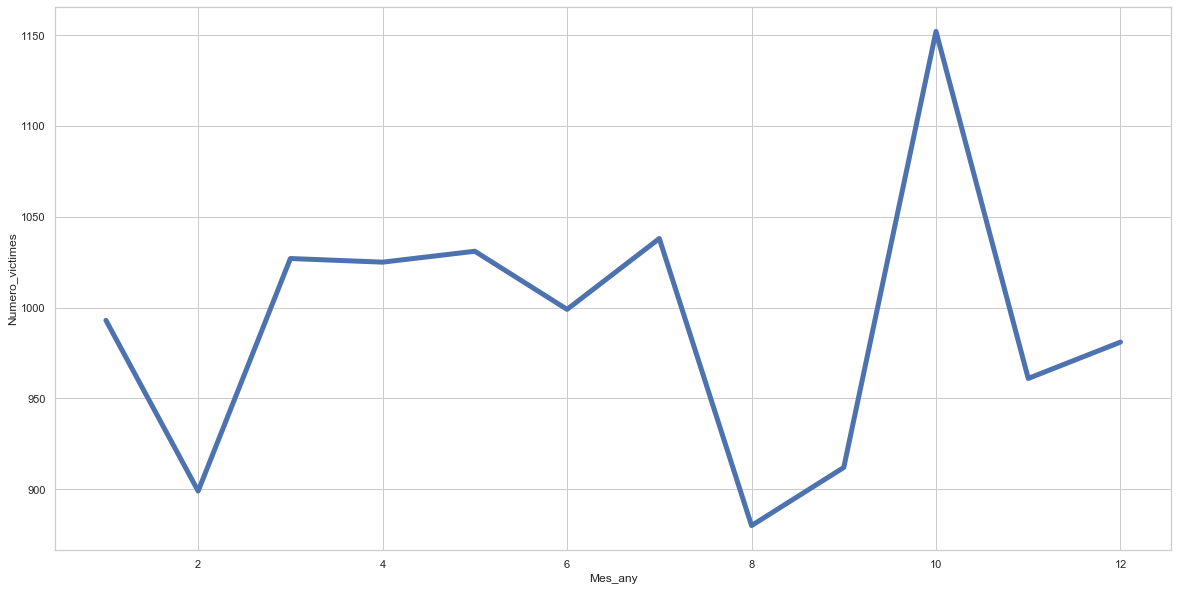

In [39]:
sns.set(style="whitegrid") 
#palette = sns.color_palette("mako_r", 6)

ax = plt.figure(figsize=(20,10))
sns.lineplot(x="Mes_any", y="Numero_victimes",linewidth = 5,
                  palette=palette, data=acc_18_mes)
ax.savefig('Acc_by_month_2018.png', dpi=300)

## Concatenate Years

In [16]:
acc_by_month = pd.concat([acc_18_mes, acc_17_mes, acc_16_mes], axis=0, join='outer', ignore_index=False)

In [17]:
ax = sns.lineplot(x="t", y="signal",
                  hue="region", style="event", data=fmri)

NameError: name 'fmri' is not defined

In [18]:
acc_by_month['index']=range(1,37)

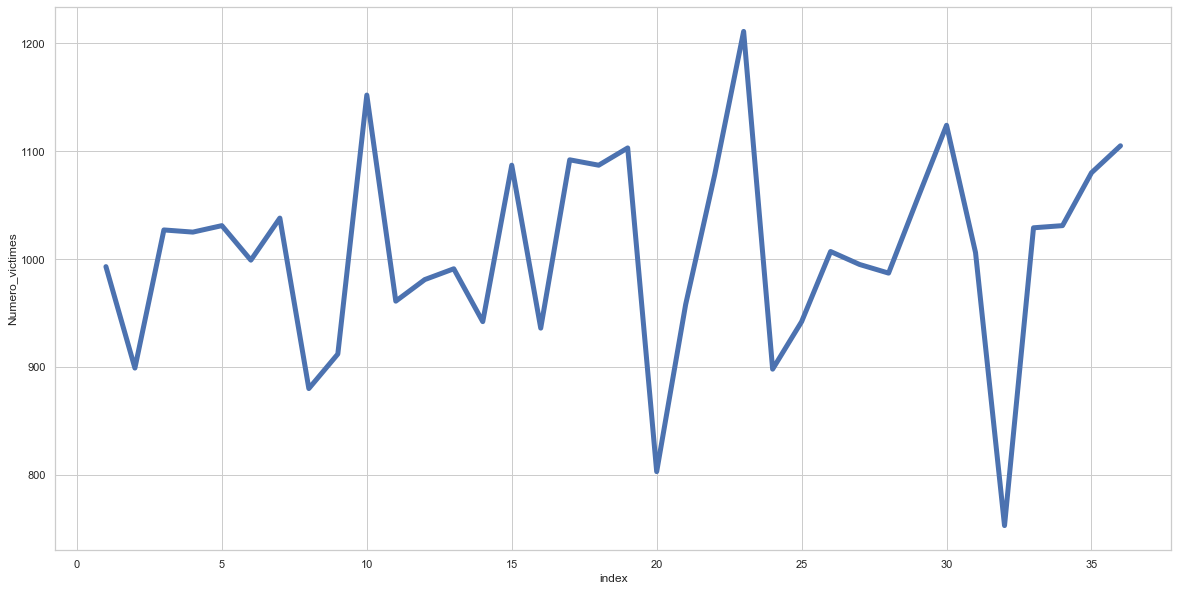

In [22]:
sns.set(style="whitegrid") 
#palette = sns.color_palette("mako_r", 6)

ax = plt.figure(figsize=(20,10))
sns.lineplot(x="index", y="Numero_victimes",linewidth = 5,
                  palette=palette, data=acc_by_month)
ax.savefig('Acc_by_month.png', dpi=300)

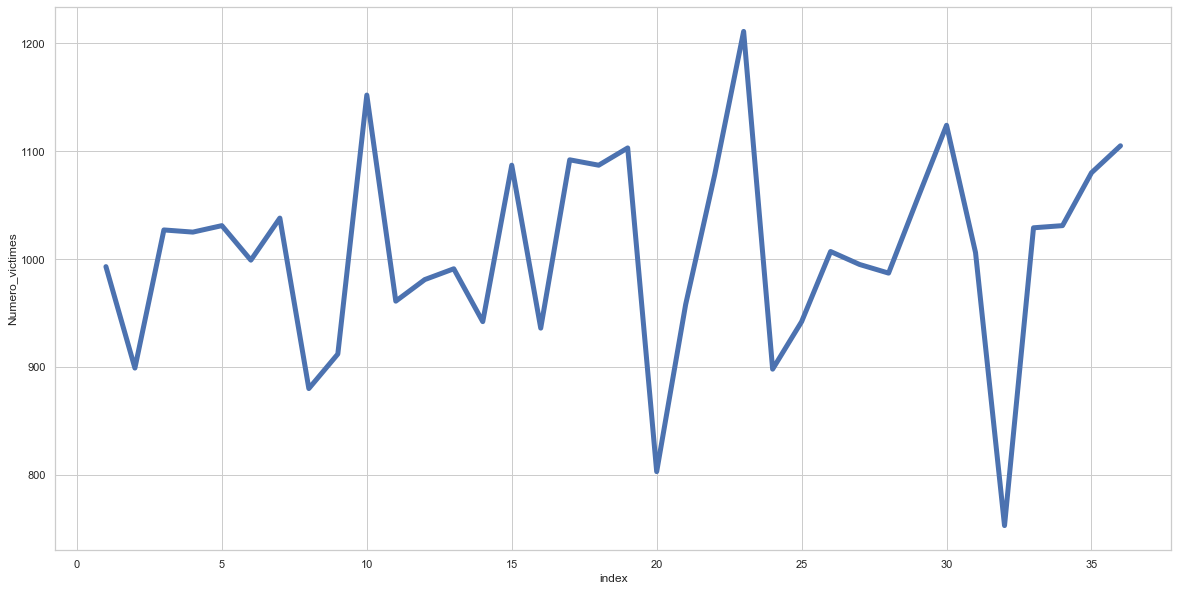

In [28]:
sns.set(style="whitegrid") 
palette = sns.color_palette("mako_r", 6)

ax = plt.figure(figsize=(20,10))
sns.lineplot(x="index", y="Numero_victimes", linewidth = 5,
                  palette=palette, data=acc_by_month)
ax.savefig('Acc_by_month.png', dpi=300)

In [69]:
a.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus',
       'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud'],
      dtype='object')

In [16]:
a=acc_18.loc[acc_18['Nom_districte']=='Eixample']

In [17]:
acc_eixample=a.groupby('Nom_barri',as_index=False).sum()
acc_eixample

,Nom_barri,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,Sant Antoni,418,2090,49502867,421762,1471,3363,3005,0,262,3,265,386,8.981585e+07,9.575091e+08,451.155409,173982.723341
1,el Fort Pienc,560,1400,48127575,565040,1876,4398,3860,0,335,5,340,539,1.208416e+08,1.283381e+09,610.499469,11591.532885
2,l'Antiga Esquerra de l'Eixample,1010,4040,83474689,1019090,3186,7549,7278,3,587,18,608,1017,2.169072e+08,2.314150e+09,7567.223734,20901.386637
3,la Dreta de l'Eixample,2298,8043,196861365,2318682,7374,18292,16105,1,1368,20,1389,2220,4.946391e+08,5.265922e+09,6812.094911,47561.840452
4,la Nova Esquerra de l'Eixample,836,3762,83958826,843524,2702,6518,5961,0,507,10,517,834,1.793395e+08,1.915198e+09,898.795786,17298.037614
5,la Sagrada Família,772,2316,73338138,778948,2491,6146,5373,0,447,17,464,774,1.664696e+08,1.769496e+09,840.162372,15982.116387


In [18]:
a.groupby('Nom_carrer',as_index=False).sum()

,Nom_carrer,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,Alí Bei ...,2,5,9209,2018,10,3,13,0,1,0,1,2,431630.85,4582978.75,2.181058,41.393593
1,Alí Bei / Bailèn ...,2,7,31300,2018,12,14,9,0,2,0,2,2,431367.20,4582735.63,2.177932,41.391381
2,Alí Bei / Marina ...,2,5,9209,2018,7,17,8,0,1,0,1,2,431937.24,4583291.59,2.184687,41.396437
3,Alí Bei / Meridiana ...,2,5,209900,2018,10,4,8,0,1,0,1,2,432127.28,4583478.89,2.186939,41.398140
4,Alí Bei / Roger de Flor ...,2,5,9209,2018,4,5,19,0,1,0,1,2,431558.69,4582921.93,2.180201,41.393076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,Villarroel / París ...,6,24,973420,6054,15,68,14,0,2,1,3,6,1286950.92,13748068.89,6.448290,124.172280
723,Villarroel / Provença ...,2,8,363809,2018,10,24,21,0,1,0,1,2,429263.55,4582400.41,2.152811,41.388180
724,napols / Casp ...,2,5,71600,2018,12,11,16,0,0,0,0,0,431464.86,4583206.91,2.179047,41.395634
725,urgell / París ...,2,8,349706,2018,3,3,20,0,0,0,0,2,428885.89,4582593.13,2.148272,41.389882


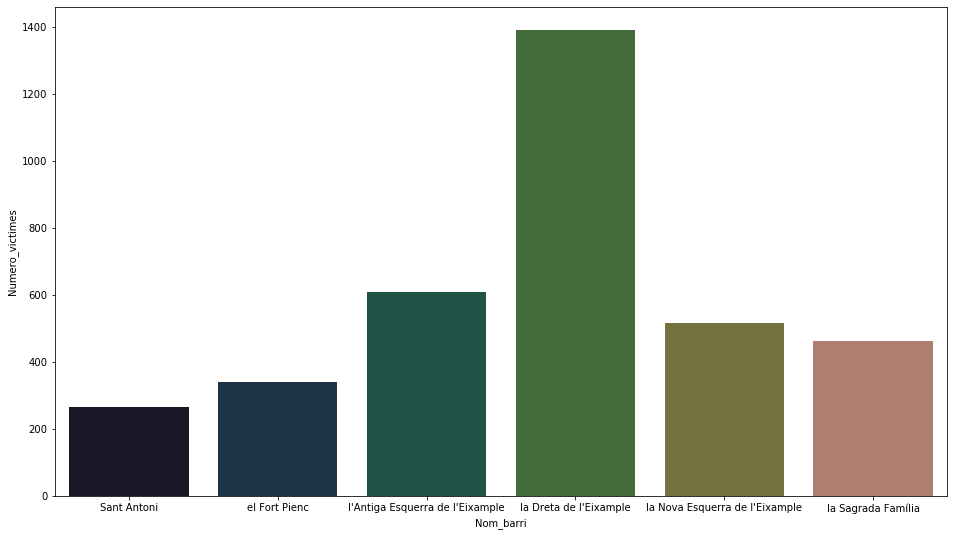

In [19]:
palette = sns.color_palette("cubehelix",10)

ax = plt.figure(figsize=(16,9))
sns.barplot(x="Nom_barri", y="Numero_victimes",
                  palette=palette, data=acc_eixample)
ax.savefig('Acc_Eixample.png', dpi=400)

In [23]:
acc_eixample.columns

Index(['Nom_barri', 'Codi_districte', 'Codi_barri', 'Codi_carrer', 'Any',
       'Mes_any', 'Dia_mes', 'Hora_dia', 'Numero_morts',
       'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud'],
      dtype='object')

In [24]:
import re
acc_eixample['Codi_carrer'].value_counts()

48127575     1
196861365    1
49502867     1
83958826     1
83474689     1
73338138     1
Name: Codi_carrer, dtype: int64